# Employee Attrition Prediction on the IBM HR Analytics Dataset

The IBM HR Analytics Employee Attrition & Performance dataset, available on Kaggle, is a popular dataset used to analyze employee attrition (i.e., turnover) in a fictional company modeled after IBM. The dataset is structured and contains a mix of categorical and numerical features that provide insights into the factors that may influence whether an employee leaves the company.
Key Features:

- Employee Information: Includes attributes like age, gender, marital status, and number of years at the company.
- Job Role and Department: Data on the employee's role, department, job level, and job satisfaction.
- Compensation and Benefits: Information on monthly income, stock options, and whether an employee has received a raise or promotion.
- Work Environment: Features like work-life balance, overtime, and the distance from home to work.
- Performance Metrics: Includes performance ratings, training hours, and whether the employee was involved in any work accidents.
- Attrition: The target variable indicating whether the employee has left the company (Yes/No).

Usage:

This dataset is commonly used in machine learning projects to predict employee attrition using various classification algorithms. Analysts and data scientists often explore correlations between the various features and attrition, helping businesses identify the key factors that contribute to employee turnover.

Potential Analyses:

- Exploratory Data Analysis (EDA): Understanding the distribution and relationships of the features.
- Predictive Modeling: Building models to predict which employees are at risk of leaving.
- Feature Importance: Determining which factors are most influential in employee attrition.

The dataset is well-suited for both beginners and advanced users who are interested in HR analytics, providing a rich set of features for various types of analyses.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("IBM-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# converting the attrition target variable to a binary feature with 1/0 mapping
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: titl

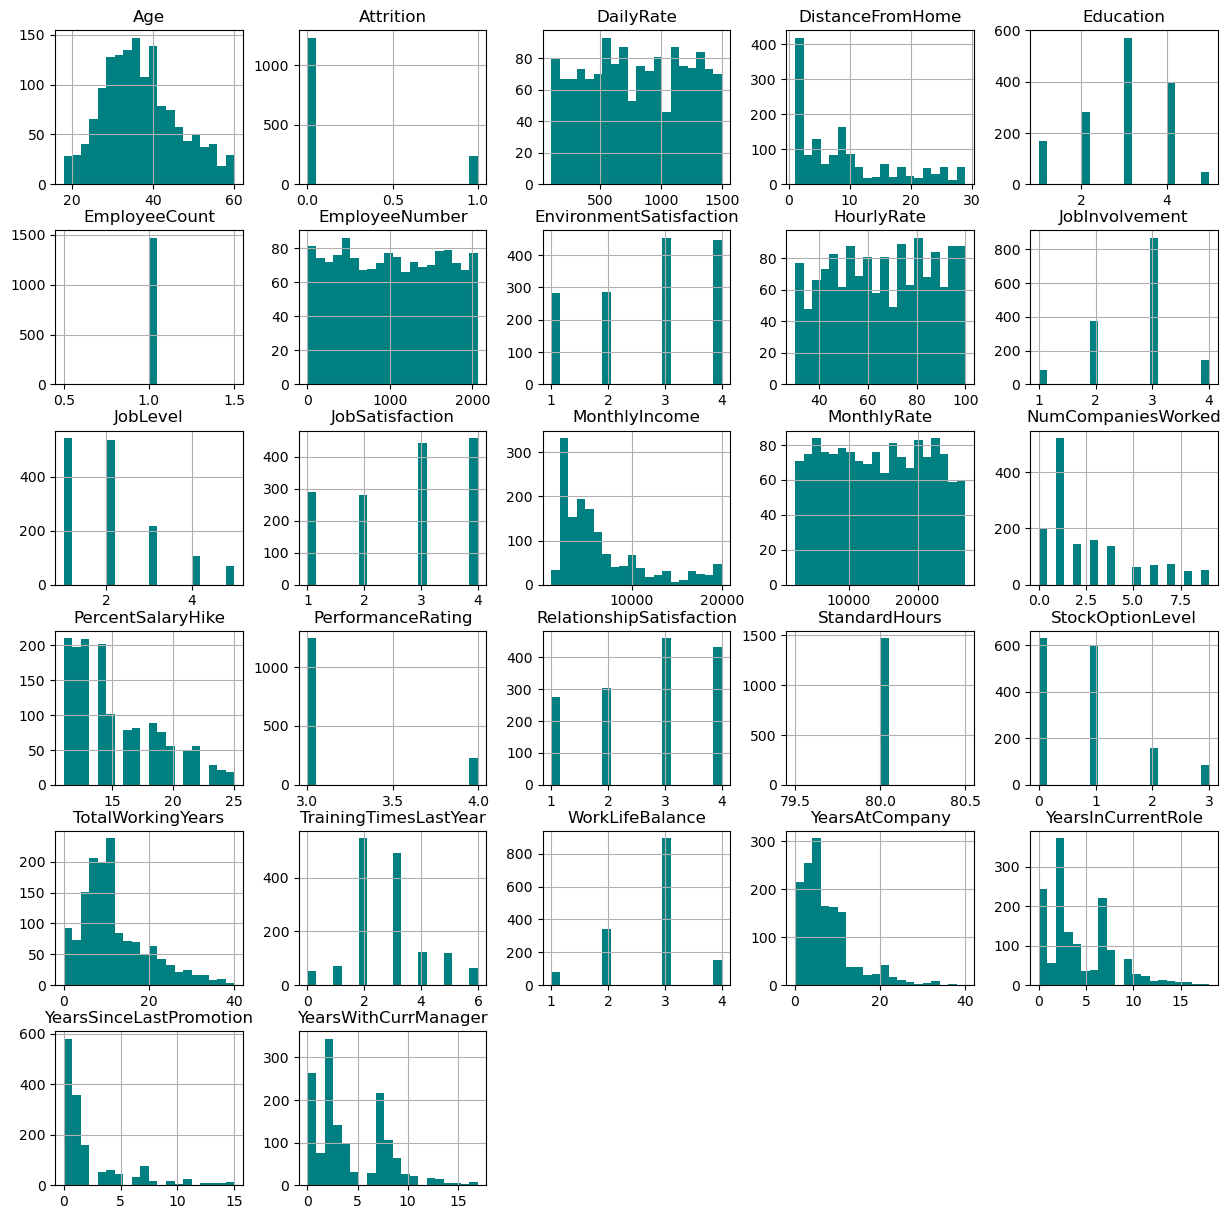

In [5]:
df.hist(figsize=(15, 15), bins=20, color='teal')

- We can observe a class imbalance in the Target Variable that is 'Attrition'. This may be a cause for concern down the road
- Some distributions are right-skewed such as MonthlyIncome, DistanceFromHome, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion
- EmployeeNumber maybe the UID used given the uniform-like distribution

In [6]:
df[['EmployeeCount','StandardHours']].describe()

,EmployeeCount,StandardHours
count,1470.0,1470.0
mean,1.0,80.0
std,0.0,0.0
min,1.0,80.0
25%,1.0,80.0
50%,1.0,80.0
75%,1.0,80.0
max,1.0,80.0


These features seems to be redundant and may be dropped from the dataset

In [7]:
df = df.drop(columns=['EmployeeCount', 'StandardHours'])

In [8]:
mu = df.loc[df['Attrition'] == 1, 'Age'].mean()
print("The average age of Ex-Employees {:.2f}".format(mu))

mu = df.loc[df['Attrition'] == 0, 'Age'].mean()
print("The average age of Current-Employees {:.2f}".format(mu))

The average age of Ex-Employees 33.61
The average age of Current-Employees 37.56


In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.to_csv("cleaned_data.csv", index=False)

OneHot Encoding the Categorical Variables 

In [11]:
categorical_features = []
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() > 2:
        categorical_features.append(col)

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_features))

df = pd.concat([df, encoded_df], axis=1)

In [12]:
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() <= 2:
        print(df[col].value_counts())

Gender
Male      882
Female    588
Name: count, dtype: int64
Over18
Y    1470
Name: count, dtype: int64
OverTime
No     1054
Yes     416
Name: count, dtype: int64


In [13]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df.drop(columns='Over18', inplace=True)

In [14]:
df = df.drop(categorical_features, axis=1)

In [15]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,0,94,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0,279,8,1,2,3,1,61,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,4,1,92,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,5,4,0,56,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,7,1,1,40,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EmployeeNumber                     1470 non-null   int64  
 6   EnvironmentSatisfaction            1470 non-null   int64  
 7   Gender                             1470 non-null   int64  
 8   HourlyRate                         1470 non-null   int64  
 9   JobInvolvement                     1470 non-null   int64  
 10  JobLevel                           1470 non-null   int64  
 11  JobSatisfaction                    1470 non-null   int64

In [17]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,0.600000,65.891156,2.729932,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,0.490065,20.329428,0.711561,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,0.000000,48.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.isnull().sum().sort_values()

Age                                  0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
EducationField_Human Resources       0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
YearsWithCurrManager                 0
EducationField_Other                 0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director            0
JobRole_Research Scientist           0
JobRole_Sales Executive              0
JobRole_Sales Representative         0
MaritalStatus_Divorced               0
EducationField_Technical Degree      0
MaritalStatus_Married                0
YearsSinceLastPromotion  

There are no null values so that is good.

Plotting the Correlation Matrix


<Axes: >

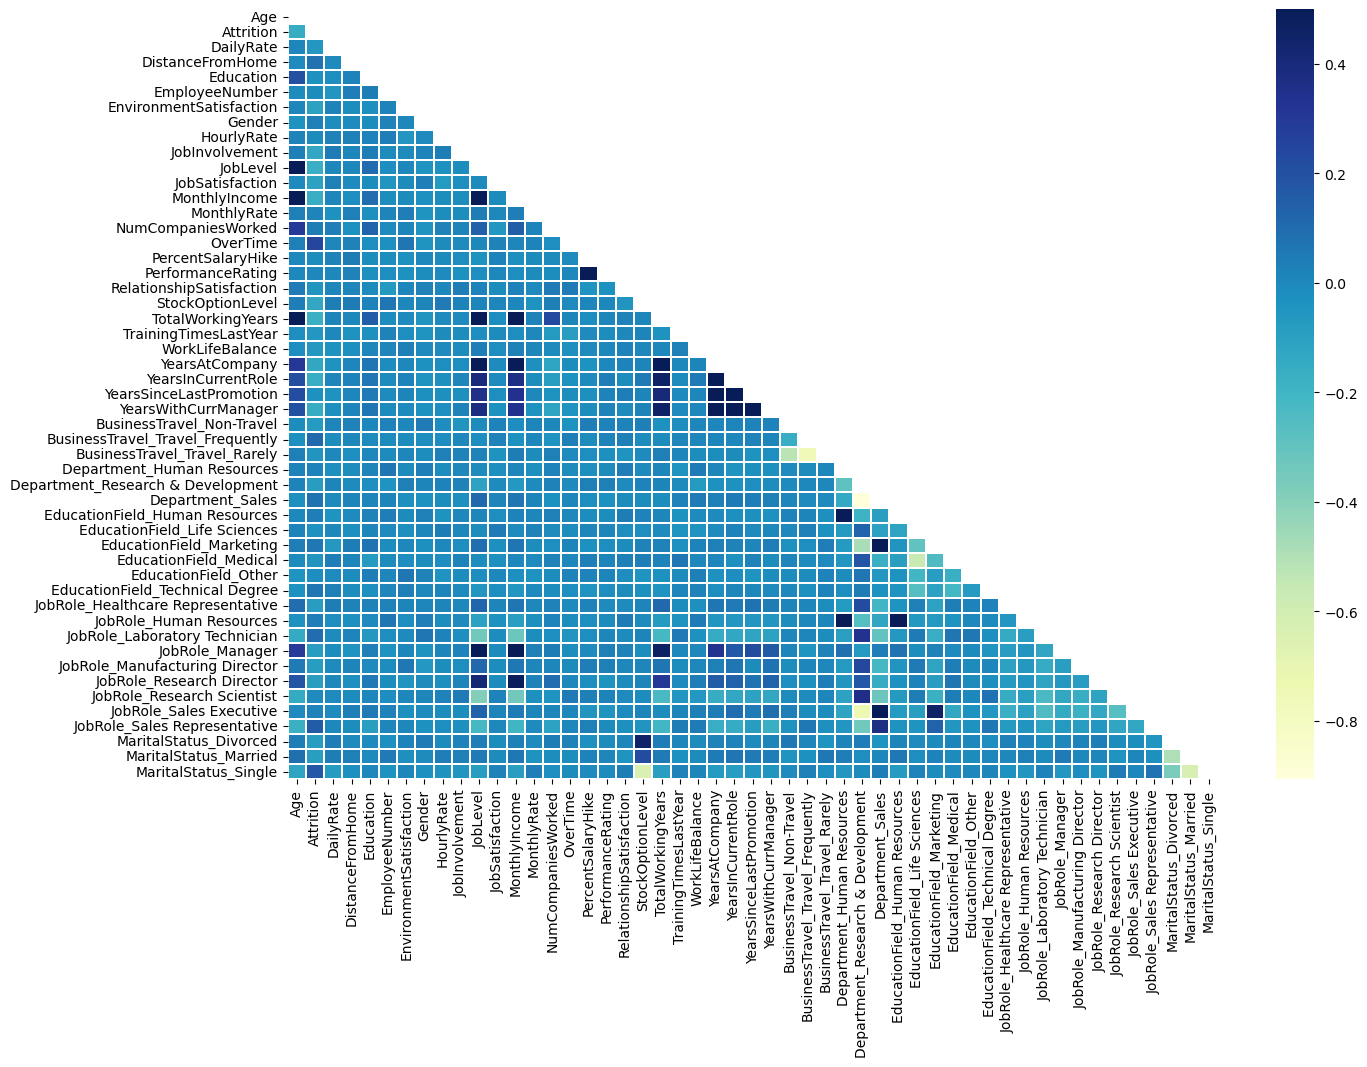

In [19]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

Scaling the Features

In [85]:
scaler = MinMaxScaler()
cols = list(df.columns)
cols.remove('Attrition')

for col in cols:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])

df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1.0,0.715820,0.000000,0.25,0.000000,0.333333,0.0,0.914286,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.000484,0.666667,1.0,0.442857,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,0.001451,1.000000,1.0,0.885714,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,0.001935,1.000000,0.0,0.371429,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.002903,0.000000,1.0,0.142857,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
df.shape

(1470, 51)

In [87]:
X = df
X = X.drop(columns=['EmployeeNumber', 'Attrition'])
y = df['Attrition'].copy()


In [88]:
X.shape

(1470, 49)

Train Test Split with Stratified Sampling to combat Class Imbalance

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y) 

In [90]:
X_train.shape

(1102, 49)

In [91]:
X_test.shape

(368, 49)

In [92]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)